# Speech Ratio Notebook 
Go to Cell > Run All to run the notebook. 

In [2]:
import pandas as pd
import numpy as np 
import csv
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("/Users/Meg/Box Sync/Diss_data/Fall_2019_LRAP/Daylong_recordings/summer_2019/1094/output/biling_responses.csv")

This gives you a general sense of the speech breakdown of the participant.

In [4]:
lToCat = df["Speech"].value_counts()
lToCat

Categorize speech    3
ODS                  1
Name: Speech, dtype: int64

## Speech Ratio/Variance vs. Entry Number

In [5]:
CDS, ODS, mixed, other = 1, 1, 1, 1
num = 0
entryNums = []
CDSRatios = []
ODSRatios = []
mixedRatios = []
variances = []
for index, row in df.iterrows(): 
    lang = row['Speech']
    if lang == 'CDS': 
        CDS += 1 
    elif lang == 'ODS':
        ODS += 1 
    elif lang == 'Mixed': 
        mixed += 1
    else: 
        other += 1
    entryNums.append(num)
    num += 1
    CDSRatios.append(CDS/(ODS + CDS + mixed))
    ODSRatios.append(ODS/(ODS + CDS + mixed))
    mixedRatios.append(mixed/(ODS + CDS + mixed))
    variances.append(np.var(CDSRatios))

## Speech Ratio
This will display the ratio of CDS compared to the rest of the counts, an error bar is also displayed which shows the variance at each point, which should also decrease.

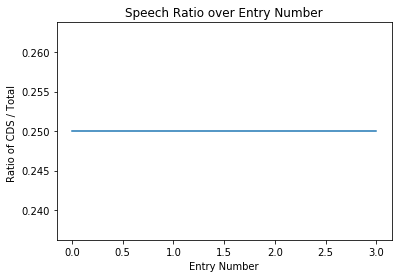

In [6]:
### RATIOS VS ENTRY NUMS
plt.title('Speech Ratio over Entry Number')
plt.ylabel('Ratio of CDS / Total ')
plt.xlabel('Entry Number')
plt.plot(entryNums, CDSRatios)
plt.errorbar(entryNums, CDSRatios, yerr=variances, fmt='none', ecolor='#e67f83');
plt.show()

## Variance
We want variance to get lower over the number of entries, so that the CDS:ODS ratio stabilizes over time. It is important to watch variance and the graph above, just marking the ratio to find out when there have been enough entries annotated.

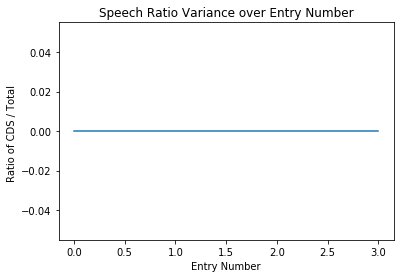

In [7]:
## VARIANCE VS ENTRY NUMS
plt.title('Speech Ratio Variance over Entry Number')
plt.ylabel('Ratio of CDS / Total ')
plt.xlabel('Entry Number')
plt.plot(entryNums, variances)
plt.show()

## Speech Category 
This is the count of category, a bar graph showing how many entries there are of each type. 

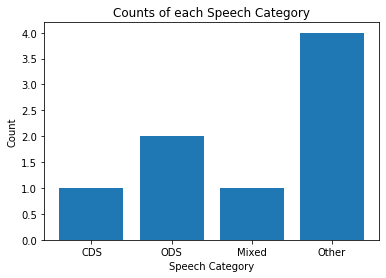

In [8]:
x = np.arange(4)
plt.bar(x, [CDS, ODS, mixed, other])
plt.xticks(x, ('CDS', 'ODS', 'Mixed', 'Other'))
plt.title('Counts of each Speech Category')
plt.xlabel('Speech Category')
plt.ylabel('Count')
plt.show()

## Stackplot of Ratios
This shows what the breakdown over entry number each language has.

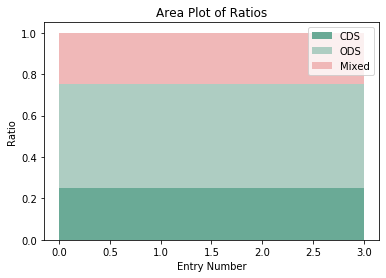

In [9]:
plt.stackplot(entryNums, [CDSRatios, ODSRatios, mixedRatios], baseline='zero', labels=['CDS', 'ODS', 
                            'Mixed'], colors=['#6aaa96', '#aecdc2', '#f0b8b8'])
plt.title('Area Plot of Ratios')
plt.xlabel('Entry Number')
plt.ylabel('Ratio')
plt.legend()
plt.show()

### 